Делаем полноценный скрипт для обучения нейросети, это будет нейросеть для задачи линейной регрессии

Сгенерируем наши исходные данные

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

Для начала определимся с тем, где будут жить наши тензоры: на GPU или CPU

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

Сгенерируем исходные данные для линейной регрессии

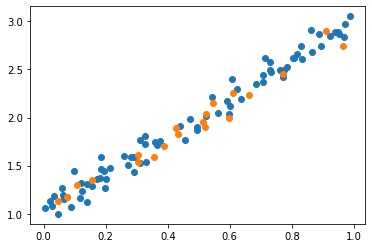

In [ ]:
np.random.seed(42)
data_size = 100

x = np.random.rand(data_size, 1)
y = 1 + 2 * x + .1 * np.random.randn(data_size, 1)

# Перемешаем индексы
idx = np.arange(data_size)
np.random.shuffle(idx)

# Возьмем первые 80% для тренировки
margin = int(data_size * 0.8)
train_idx = idx[:margin]
# оставшиеся 20% для валидации
val_idx = idx[margin:]

# Соберем датасеты
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

plt.plot(x_train, y_train, 'o')
plt.plot(x_val, y_val, 'o')

Определим гиперпараметры: количество эпох и шаг обучения. Зафиксируем генератор случайных чисел в PyTorch

In [ ]:
lr = 1e-1
n_epochs = 1000
torch.manual_seed(42)

Создадим тензоры для исходных данных

In [ ]:
x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)

Создадим тензоры для параметров регрессии **а** и **b**. Инициализируем их случайными значениями

Обратите внимание на параметр **requires_grad**=**True**, таким образом мы сообщаем PyTorch, что он должен менять эти значения

In [ ]:
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
a

tensor([-0.5187], device='cuda:0', requires_grad=True)

Собственно, цикл обучения

In [ ]:
import torch.optim as optim

# Оптимизатор будет обновлять параметры
optimizer = optim.SGD([a, b], lr=lr)

for epoch in range(n_epochs):
    # Считаем целевую переменную yhat
    yhat = a + b * x_train_tensor
    # Считаем ошибку
    error = y_train_tensor - yhat
    # Считаем лосс
    loss = (error ** 2).mean()

    # Здесь считается градиент для каждого тензора (а и b) и записывается в параметры a и b
    loss.backward()     
    
    # Обновляем параметры. Обязательно делать это в режиме no_grad()
    # with torch.no_grad():
    #     a -= lr * a.grad
    #     b -= lr * b.grad
    optimizer.step()
    
    # Обнуляем градиенты
    optimizer.zero_grad()
    
print(f'a = {a.item()}, b = {b.item()}')

a = 1.023543119430542, b = 1.9689600467681885
